# Data collection notebook for thought of direction detection

### Library setups and imports

In [1]:
!pip install -r requirements.txt

  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
Processing c:\users\tsb\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\wrapt-1.11.2.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



In [2]:
import os
from time import sleep
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
from pylsl import StreamInlet, resolve_stream

### Parameters

In [3]:
# Current detection of thinking - either "Left", "None" or "Right"
LABELS = ['Left', 'None', 'Right']
CURRENT_LABEL = input() or 'None'
assert CURRENT_LABEL in LABELS

None


In [4]:
CHANNELS_COUNT = 8
ITTERATIONS = 20
TIME_BETWEEN_ITTERATIONS = 0.8
FREQUENCY_CLIP = 60
DATA_DIR='data/personal'

### Initializing LSL stream reading

In [5]:
stream = resolve_stream('type', 'EEG')[0]
inlet = StreamInlet(stream)

### Collecting data from headset

In [6]:
ffts = []
for i in range(ITTERATIONS):
    fft_data = []
    for _ in range(CHANNELS_COUNT):
        # TODO: fft_data[i] = [inlet.pull_sample()[0] for j in range(CHANNELS_COUNT)]
        sample, _ = inlet.pull_sample()
        fft_data.append(sample[:FREQUENCY_CLIP])

    ffts.append(fft_data)

    if i != ITTERATIONS - 1:
        sleep(TIME_BETWEEN_ITTERATIONS)

### Plotting all the itterations read

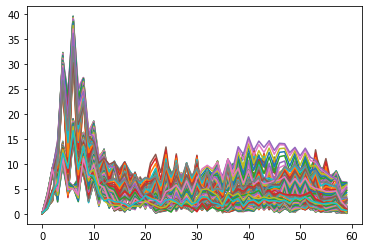

In [7]:
plt.clf()
for fft_data in ffts:
    for channel in fft_data:
        plt.plot(channel)
plt.show()

### Storing data for training

In [8]:
path = os.path.join(DATA_DIR, CURRENT_LABEL)

if not os.path.exists(path):
    os.makedirs(path)

now = datetime.now()
timestamp = datetime.timestamp(now)

for i, fft_data in enumerate(ffts):
    np.save(os.path.join(path, '{}-{}.npy'.format(timestamp, i)), fft_data)